# UTTAR PRADESH

In [628]:
import pandas as pd

# Load the datasets for Uttar Pradesh
df_up_enrolment = pd.read_csv('/content/Uttar pradesh Enrolment Data.csv')
df_up_demographic = pd.read_csv('/content/Uttar pradesh Demographic Data.csv')
df_up_biometric = pd.read_csv('/content/Uttar pradesh Biometric Data.csv')

print("Uttar Pradesh Enrolment Dataset:")
print(df_up_enrolment.head())
print(df_up_enrolment.info())
print(df_up_enrolment.describe())

print("\nUttar Pradesh Demographic Dataset:")
print(df_up_demographic.head())
print(df_up_demographic.info())
print(df_up_demographic.describe())

print("\nUttar Pradesh Biometric Dataset:")
print(df_up_biometric.head())
print(df_up_biometric.info())
print(df_up_biometric.describe())

Uttar Pradesh Enrolment Dataset:
         date          state      district  pincode  age_0_5  age_5_17  \
0  01-04-2025  Uttar Pradesh   Maharajganj   273305      141       176   
1  01-04-2025  Uttar Pradesh         Banda   210001      250       177   
2  01-04-2025  Uttar Pradesh       Lucknow   226005       83        92   
3  01-04-2025  Uttar Pradesh  Kanpur Nagar   208004       73        44   
4  01-04-2025  Uttar Pradesh      Bahraich   271824       68        58   

   age_18_greater  
0              13  
1              30  
2              23  
3              16  
4              11  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131509 entries, 0 to 131508
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   date            131509 non-null  object
 1   state           131509 non-null  object
 2   district        131509 non-null  object
 3   pincode         131509 non-null  int64 
 4   age_0_5         1

In [629]:
df_up_enrolment['date'] = pd.to_datetime(df_up_enrolment['date'], format='%d-%m-%Y')
df_up_demographic['date'] = pd.to_datetime(df_up_demographic['date'], format='%d-%m-%Y')
df_up_biometric['date'] = pd.to_datetime(df_up_biometric['date'], format='%d-%m-%Y')

print("Data types after conversion for df_up_enrolment:")
print(df_up_enrolment.info())
print("\nData types after conversion for df_up_demographic:")
print(df_up_demographic.info())
print("\nData types after conversion for df_up_biometric:")
print(df_up_biometric.info())

Data types after conversion for df_up_enrolment:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131509 entries, 0 to 131508
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   date            131509 non-null  datetime64[ns]
 1   state           131509 non-null  object        
 2   district        131509 non-null  object        
 3   pincode         131509 non-null  int64         
 4   age_0_5         131509 non-null  int64         
 5   age_5_17        131509 non-null  int64         
 6   age_18_greater  131509 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(2)
memory usage: 7.0+ MB
None

Data types after conversion for df_up_demographic:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196621 entries, 0 to 196620
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   date           1966

In [630]:
merged_up_df_temp = pd.merge(df_up_enrolment, df_up_demographic, on=['date', 'state', 'district', 'pincode'], how='outer')
df_up_merged = pd.merge(merged_up_df_temp, df_up_biometric, on=['date', 'state', 'district', 'pincode'], how='outer')

# Identify numerical columns for NaN filling
numeric_cols = df_up_merged.select_dtypes(include=['number']).columns

# Replace NaN values in numerical columns with 0
df_up_merged[numeric_cols] = df_up_merged[numeric_cols].fillna(0)

print("Merged Uttar Pradesh DataFrame (df_up_merged) head:")
print(df_up_merged.head())
print("\nMerged Uttar Pradesh DataFrame (df_up_merged) info:")
print(df_up_merged.info())

Merged Uttar Pradesh DataFrame (df_up_merged) head:
        date          state district  pincode  age_0_5  age_5_17  \
0 2025-03-01  Uttar Pradesh     Agra   282002      0.0       0.0   
1 2025-03-01  Uttar Pradesh     Agra   282002      0.0       0.0   
2 2025-03-01  Uttar Pradesh     Agra   282003      0.0       0.0   
3 2025-03-01  Uttar Pradesh     Agra   282005      0.0       0.0   
4 2025-03-01  Uttar Pradesh     Agra   282006      0.0       0.0   

   age_18_greater  demo_age_5_17  demo_age_17_  bio_age_5_17  bio_age_17_  
0             0.0          228.0        1664.0         736.0        599.0  
1             0.0          228.0        1664.0         736.0        599.0  
2             0.0          126.0         690.0         347.0        322.0  
3             0.0          201.0        1637.0         569.0        580.0  
4             0.0          394.0        3596.0        1354.0        849.0  

Merged Uttar Pradesh DataFrame (df_up_merged) info:
<class 'pandas.core.frame.Data

In [631]:
df_up = df_up_merged[df_up_merged['state'] == 'Uttar Pradesh'].copy()
df_up['year'] = df_up['date'].dt.year
df_up['month'] = df_up['date'].dt.month

print("Shape of df_up:", df_up.shape)
print("\nFirst 5 rows of df_up with new 'year' and 'month' columns:")
print(df_up.head())

Shape of df_up: (555158, 13)

First 5 rows of df_up with new 'year' and 'month' columns:
        date          state district  pincode  age_0_5  age_5_17  \
0 2025-03-01  Uttar Pradesh     Agra   282002      0.0       0.0   
1 2025-03-01  Uttar Pradesh     Agra   282002      0.0       0.0   
2 2025-03-01  Uttar Pradesh     Agra   282003      0.0       0.0   
3 2025-03-01  Uttar Pradesh     Agra   282005      0.0       0.0   
4 2025-03-01  Uttar Pradesh     Agra   282006      0.0       0.0   

   age_18_greater  demo_age_5_17  demo_age_17_  bio_age_5_17  bio_age_17_  \
0             0.0          228.0        1664.0         736.0        599.0   
1             0.0          228.0        1664.0         736.0        599.0   
2             0.0          126.0         690.0         347.0        322.0   
3             0.0          201.0        1637.0         569.0        580.0   
4             0.0          394.0        3596.0        1354.0        849.0   

   year  month  
0  2025      3  
1  20

In [632]:
age_columns = ['age_0_5', 'age_5_17', 'age_18_greater', 'demo_age_5_17', 'demo_age_17_', 'bio_age_5_17', 'bio_age_17_']

df_up_agg = df_up.groupby(['year', 'month', 'state', 'district'])[age_columns].sum().reset_index()

print("Aggregated DataFrame (df_up_agg) head:")
print(df_up_agg.head())
print("\nAggregated DataFrame (df_up_agg) info:")
print(df_up_agg.info())

Aggregated DataFrame (df_up_agg) head:
   year  month          state        district  age_0_5  age_5_17  \
0  2025      3  Uttar Pradesh            Agra    280.0     494.0   
1  2025      3  Uttar Pradesh         Aligarh    226.0     353.0   
2  2025      3  Uttar Pradesh       Allahabad      0.0       0.0   
3  2025      3  Uttar Pradesh  Ambedkar Nagar      0.0       0.0   
4  2025      3  Uttar Pradesh          Amethi      0.0       0.0   

   age_18_greater  demo_age_5_17  demo_age_17_  bio_age_5_17  bio_age_17_  
0           132.0         3843.0       40068.0       17105.0      10213.0  
1            44.0         2359.0       31457.0       16168.0       4603.0  
2             0.0         4090.0       50209.0       22258.0      10903.0  
3             0.0         1957.0       21208.0        5519.0       5133.0  
4             0.0         1304.0       18225.0        5567.0       4178.0  

Aggregated DataFrame (df_up_agg) info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947 en

In [633]:
import numpy as np

# 1. Create 'totalenrolments' column
df_up_agg['totalenrolments'] = df_up_agg['age_0_5'] + df_up_agg['age_5_17'] + df_up_agg['age_18_greater']

# 2. Create 'childenrolments' column
df_up_agg['childenrolments'] = df_up_agg['age_0_5'] + df_up_agg['age_5_17']

# 3. Create 'totaldemoupdates' column
df_up_agg['totaldemoupdates'] = df_up_agg['demo_age_5_17'] + df_up_agg['demo_age_17_']

# 4. Create 'totalbioupdates' column
df_up_agg['totalbioupdates'] = df_up_agg['bio_age_5_17'] + df_up_agg['bio_age_17_']

# 5. Calculate 'CES' (Child Enrolment Score) with division by zero handling
df_up_agg['CES'] = np.where(
    df_up_agg['totalenrolments'] == 0,
    0,
    df_up_agg['childenrolments'] / df_up_agg['totalenrolments']
)

# 6. Calculate 'DUR' (Demographic Update Rate) with division by zero handling
df_up_agg['DUR'] = np.where(
    df_up_agg['totalenrolments'] == 0,
    0,
    df_up_agg['totaldemoupdates'] / df_up_agg['totalenrolments']
)

# 7. Calculate 'BUR' (Biometric Update Rate) with division by zero handling
df_up_agg['BUR'] = np.where(
    df_up_agg['totalenrolments'] == 0,
    0,
    df_up_agg['totalbioupdates'] / df_up_agg['totalenrolments']
)

# 8. Display the head of the DataFrame
print("Aggregated DataFrame (df_up_agg) with new metrics head:")
print(df_up_agg.head())

Aggregated DataFrame (df_up_agg) with new metrics head:
   year  month          state        district  age_0_5  age_5_17  \
0  2025      3  Uttar Pradesh            Agra    280.0     494.0   
1  2025      3  Uttar Pradesh         Aligarh    226.0     353.0   
2  2025      3  Uttar Pradesh       Allahabad      0.0       0.0   
3  2025      3  Uttar Pradesh  Ambedkar Nagar      0.0       0.0   
4  2025      3  Uttar Pradesh          Amethi      0.0       0.0   

   age_18_greater  demo_age_5_17  demo_age_17_  bio_age_5_17  bio_age_17_  \
0           132.0         3843.0       40068.0       17105.0      10213.0   
1            44.0         2359.0       31457.0       16168.0       4603.0   
2             0.0         4090.0       50209.0       22258.0      10903.0   
3             0.0         1957.0       21208.0        5519.0       5133.0   
4             0.0         1304.0       18225.0        5567.0       4178.0   

   totalenrolments  childenrolments  totaldemoupdates  totalbioupdates  

In [634]:
def min_max_normalize(series):
    min_val = series.min()
    max_val = series.max()
    if max_val == min_val:
        return 0  # Handle division by zero case
    return (series - min_val) / (max_val - min_val)

# Apply min-max normalization to 'totalenrolments', grouped by 'year' and 'state'
df_up_agg['Enorm'] = df_up_agg.groupby(['year', 'state'])['totalenrolments'].transform(min_max_normalize)

# Apply min-max normalization to 'totaldemoupdates', grouped by 'year' and 'state'
df_up_agg['Dnorm'] = df_up_agg.groupby(['year', 'state'])['totaldemoupdates'].transform(min_max_normalize)

# Apply min-max normalization to 'totalbioupdates', grouped by 'year' and 'state'
df_up_agg['Bnorm'] = df_up_agg.groupby(['year', 'state'])['totalbioupdates'].transform(min_max_normalize)

# Calculate 'stdnorm' by combining the normalized metrics
df_up_agg['stdnorm'] = (df_up_agg['Enorm'] + df_up_agg['Dnorm'] + df_up_agg['Bnorm']) / 3

# Compute 'ALBI' (Aadhaar Lifecycle Balance Index) as 1 - stdnorm
df_up_agg['ALBI'] = 1 - df_up_agg['stdnorm']

# Clip the values in the 'ALBI' column to ensure they are between 0 and 1
df_up_agg['ALBI'] = df_up_agg['ALBI'].clip(lower=0, upper=1)

# Display the head of the DataFrame to show the newly created columns
print("Aggregated DataFrame (df_up_agg) with normalized metrics and ALBI head:")
print(df_up_agg.head())

Aggregated DataFrame (df_up_agg) with normalized metrics and ALBI head:
   year  month          state        district  age_0_5  age_5_17  \
0  2025      3  Uttar Pradesh            Agra    280.0     494.0   
1  2025      3  Uttar Pradesh         Aligarh    226.0     353.0   
2  2025      3  Uttar Pradesh       Allahabad      0.0       0.0   
3  2025      3  Uttar Pradesh  Ambedkar Nagar      0.0       0.0   
4  2025      3  Uttar Pradesh          Amethi      0.0       0.0   

   age_18_greater  demo_age_5_17  demo_age_17_  bio_age_5_17  ...  \
0           132.0         3843.0       40068.0       17105.0  ...   
1            44.0         2359.0       31457.0       16168.0  ...   
2             0.0         4090.0       50209.0       22258.0  ...   
3             0.0         1957.0       21208.0        5519.0  ...   
4             0.0         1304.0       18225.0        5567.0  ...   

   totaldemoupdates  totalbioupdates       CES        DUR        BUR  \
0           43911.0          273

In [635]:
df_up_agg['Enormrisk'] = 1 - df_up_agg['Enorm']
df_up_agg['CESrisknorm'] = 1 - df_up_agg['CES']
df_up_agg['DURrisknorm'] = 1 - df_up_agg['DUR']
df_up_agg['BURrisknorm'] = 1 - df_up_agg['BUR']
df_up_agg['ALBIrisknorm'] = 1 - df_up_agg['ALBI']

# Calculate the 'riskscore' by summing the risk components, averaging, and scaling to 0-100
df_up_agg['riskscore'] = (
    df_up_agg['Enormrisk'] +
    df_up_agg['CESrisknorm'] +
    df_up_agg['DURrisknorm'] +
    df_up_agg['BURrisknorm'] +
    df_up_agg['ALBIrisknorm']
) / 5 * 100

# Display the head of the DataFrame to show the newly created risk-related columns
print("Aggregated DataFrame (df_up_agg) with risk components and riskscore head:")
print(df_up_agg.head())

Aggregated DataFrame (df_up_agg) with risk components and riskscore head:
   year  month          state        district  age_0_5  age_5_17  \
0  2025      3  Uttar Pradesh            Agra    280.0     494.0   
1  2025      3  Uttar Pradesh         Aligarh    226.0     353.0   
2  2025      3  Uttar Pradesh       Allahabad      0.0       0.0   
3  2025      3  Uttar Pradesh  Ambedkar Nagar      0.0       0.0   
4  2025      3  Uttar Pradesh          Amethi      0.0       0.0   

   age_18_greater  demo_age_5_17  demo_age_17_  bio_age_5_17  ...     Dnorm  \
0           132.0         3843.0       40068.0       17105.0  ...  0.538680   
1            44.0         2359.0       31457.0       16168.0  ...  0.414839   
2             0.0         4090.0       50209.0       22258.0  ...  0.666115   
3             0.0         1957.0       21208.0        5519.0  ...  0.284177   
4             0.0         1304.0       18225.0        5567.0  ...  0.239573   

      Bnorm   stdnorm      ALBI  Enormrisk

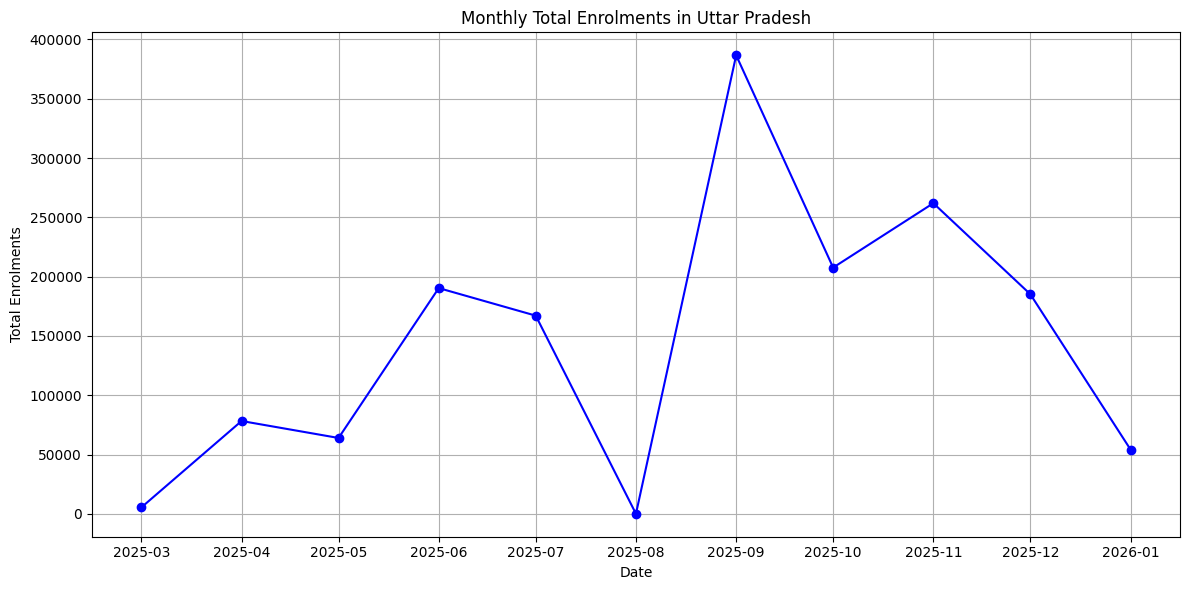

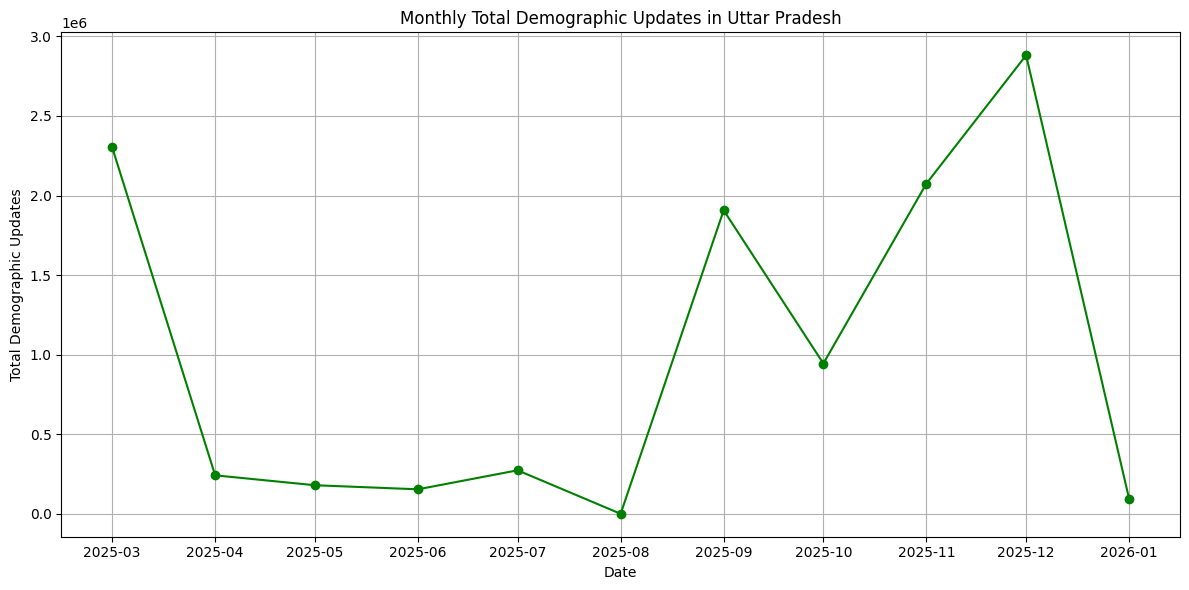

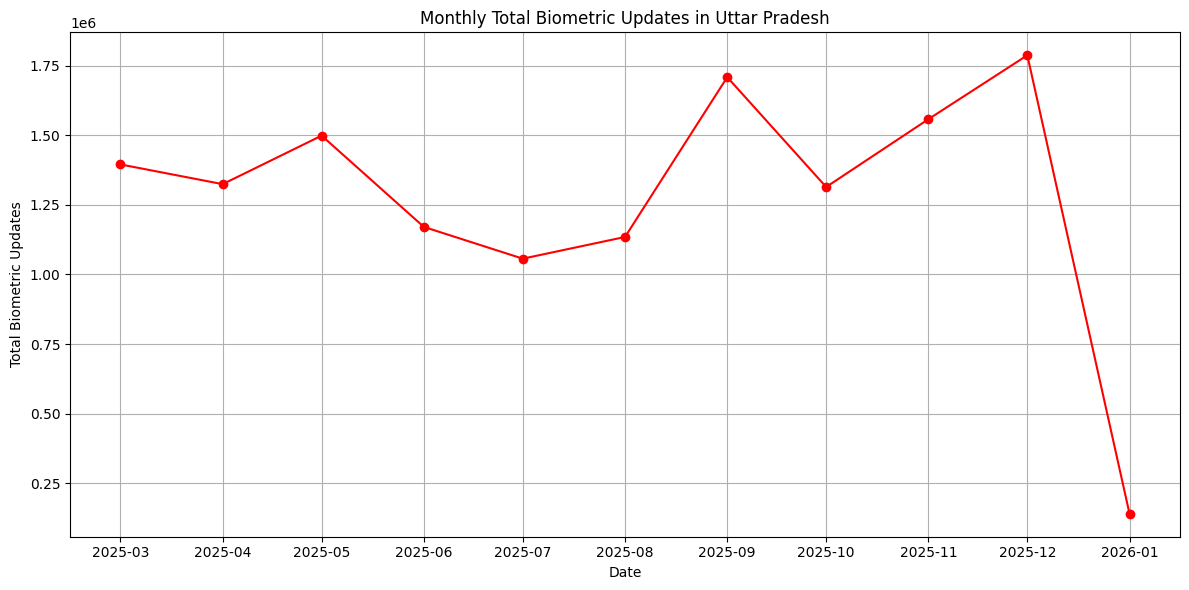

Monthly trend plots generated successfully.


In [636]:
import matplotlib.pyplot as plt

df_monthly_trends = df_up_agg.groupby(['year', 'month']).agg({
    'totalenrolments': 'sum',
    'totaldemoupdates': 'sum',
    'totalbioupdates': 'sum'
}).reset_index()

# Create a date column for plotting
df_monthly_trends['date'] = pd.to_datetime(df_monthly_trends['year'].astype(str) + '-' + df_monthly_trends['month'].astype(str) + '-01')

# Sort by date to ensure proper trend plotting
df_monthly_trends = df_monthly_trends.sort_values(by='date')

# Plotting totalenrolments monthly trend
plt.figure(figsize=(12, 6))
plt.plot(df_monthly_trends['date'], df_monthly_trends['totalenrolments'], marker='o', linestyle='-', color='blue')
plt.xlabel('Date')
plt.ylabel('Total Enrolments')
plt.title('Monthly Total Enrolments in Uttar Pradesh')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plotting totaldemoupdates monthly trend
plt.figure(figsize=(12, 6))
plt.plot(df_monthly_trends['date'], df_monthly_trends['totaldemoupdates'], marker='o', linestyle='-', color='green')
plt.xlabel('Date')
plt.ylabel('Total Demographic Updates')
plt.title('Monthly Total Demographic Updates in Uttar Pradesh')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plotting totalbioupdates monthly trend
plt.figure(figsize=(12, 6))
plt.plot(df_monthly_trends['date'], df_monthly_trends['totalbioupdates'], marker='o', linestyle='-', color='red')
plt.xlabel('Date')
plt.ylabel('Total Biometric Updates')
plt.title('Monthly Total Biometric Updates in Uttar Pradesh')
plt.grid(True)
plt.tight_layout()
plt.show()

print("Monthly trend plots generated successfully.")

**Univariate Analysis**

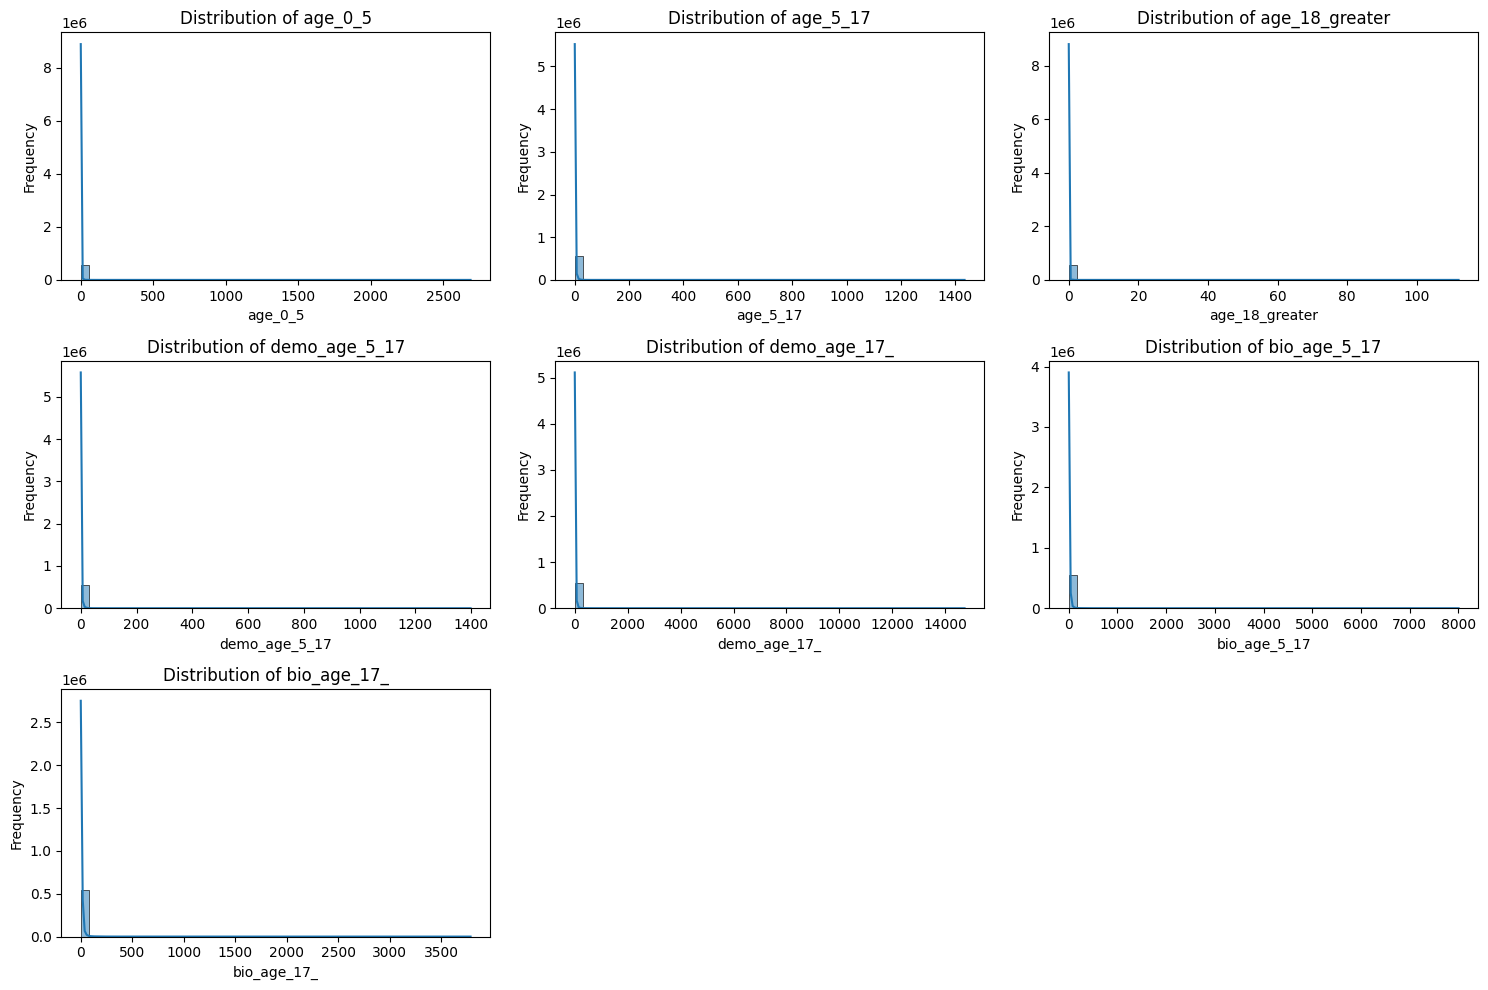

In [650]:
numerical_cols = ['age_0_5', 'age_5_17', 'age_18_greater', 'demo_age_5_17', 'demo_age_17_', 'bio_age_5_17', 'bio_age_17_']

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 3, i + 1)
    sns.histplot(df_up_merged[col], bins=50, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

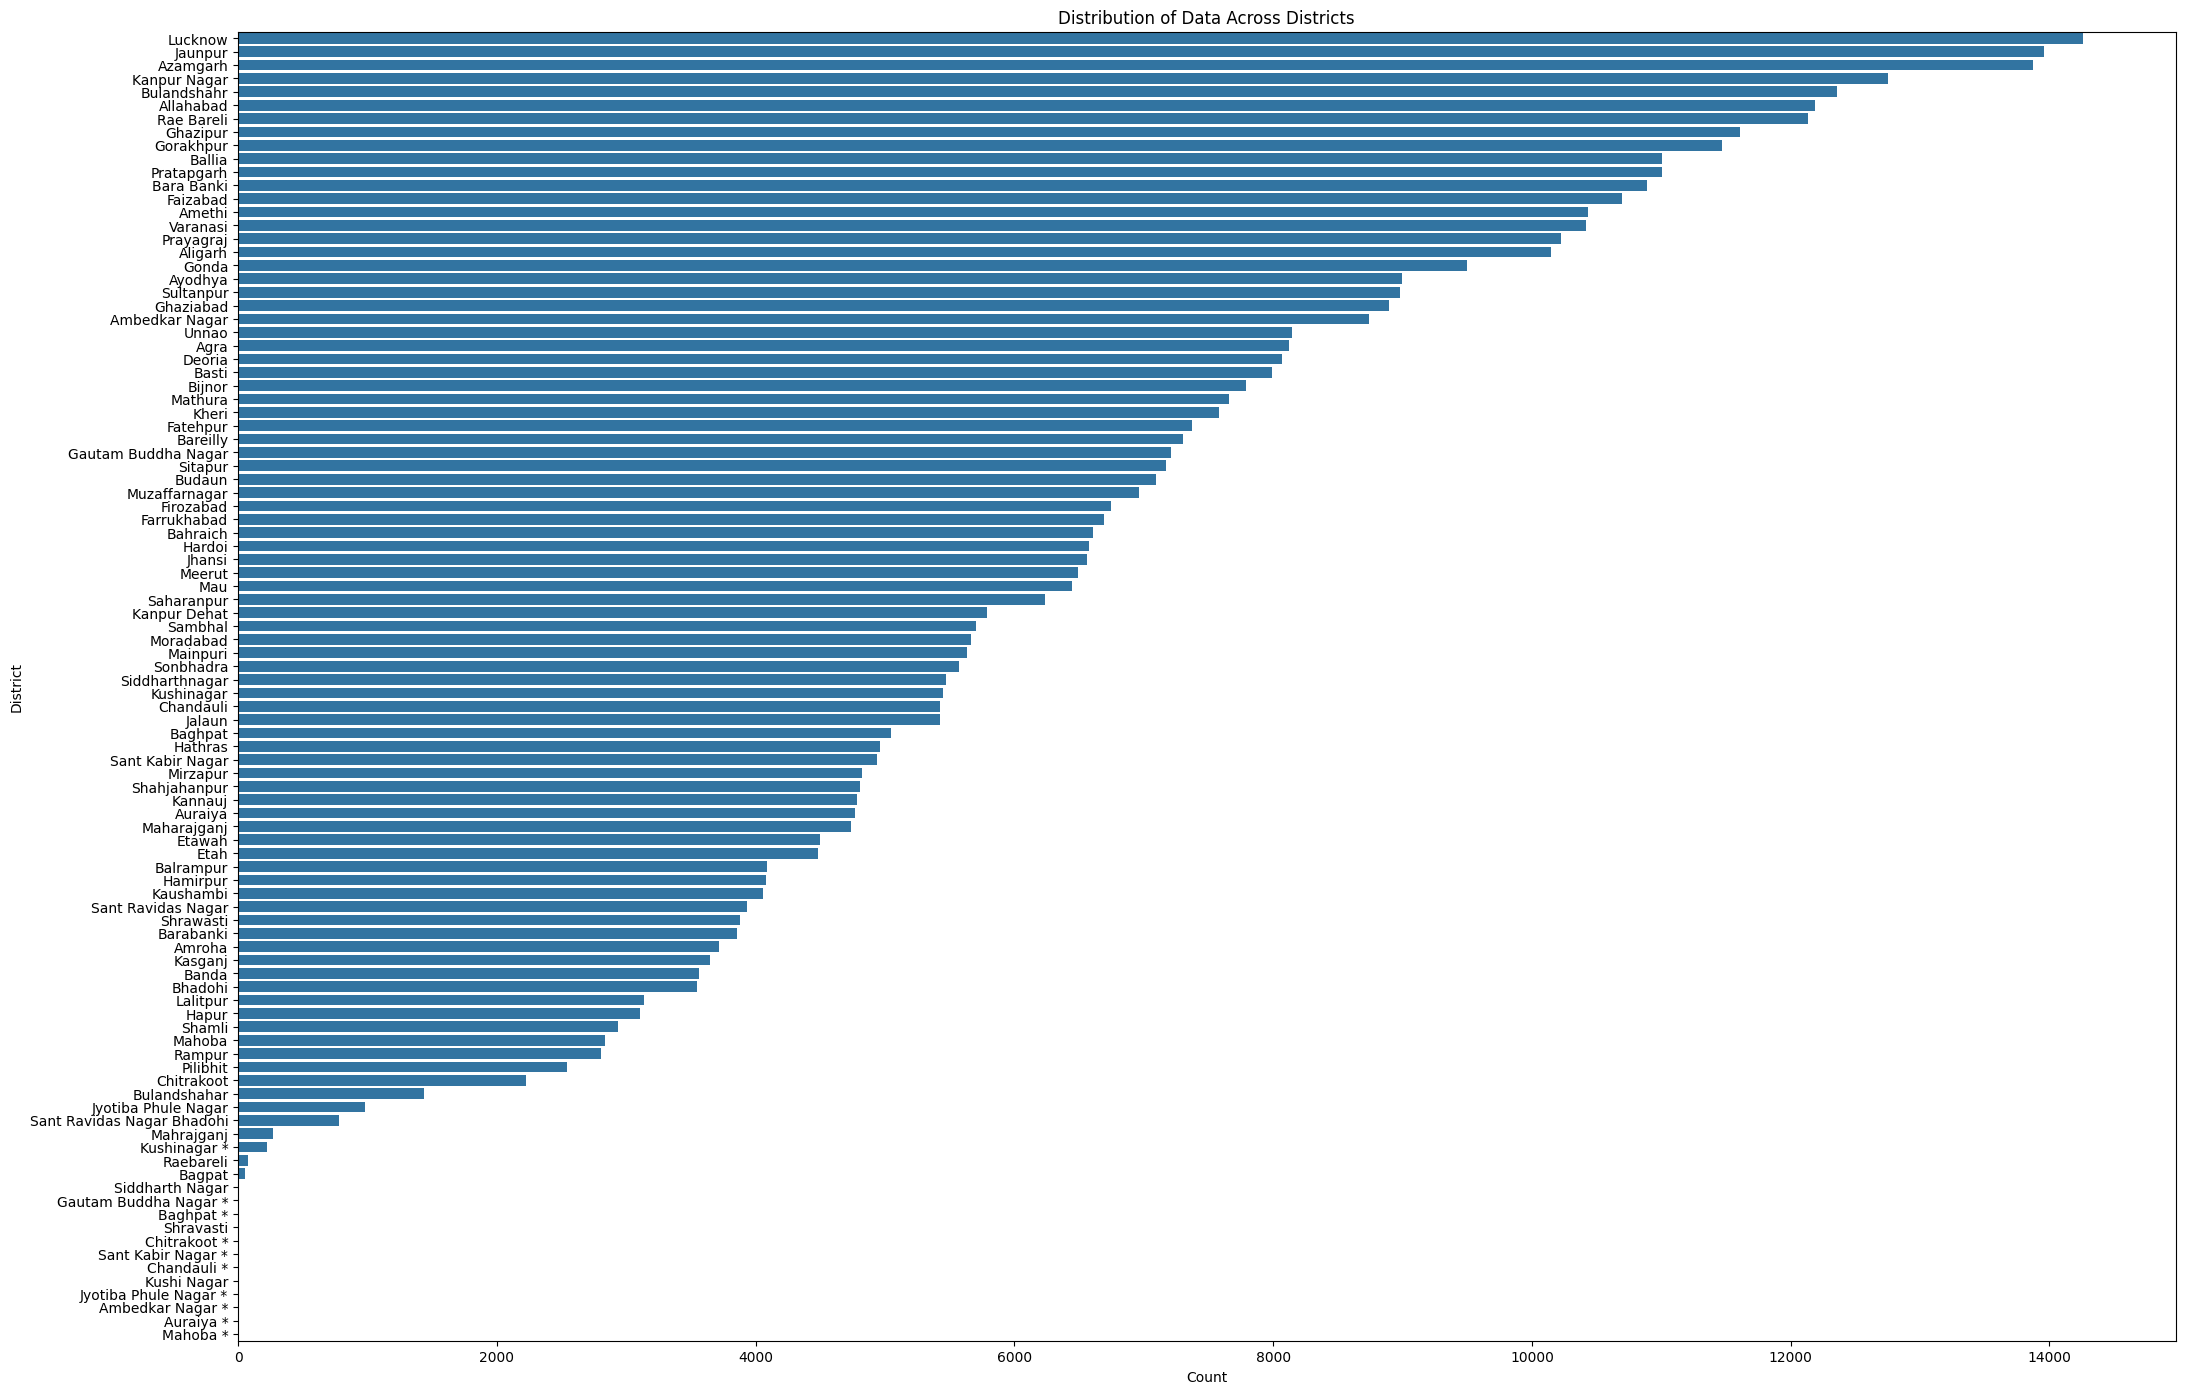

Histograms for numerical columns and count plot for 'district' displayed.


In [649]:
plt.figure(figsize=(25, 17))
sns.countplot(data=df_up_merged, y='district', order=df_up_merged['district'].value_counts().index)
plt.title('Distribution of Data Across Districts')
plt.xlabel('Count')
plt.ylabel('District')
plt.show()

print("Histograms for numerical columns and count plot for 'district' displayed.")

**Bivariate Analysis**

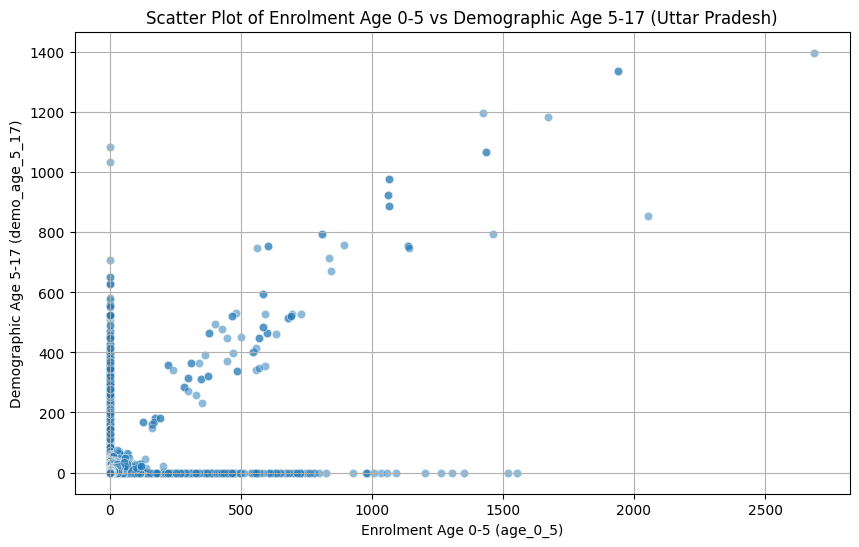

Scatter plot for 'age_0_5' vs 'demo_age_5_17' displayed.


In [638]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_up_merged, x='age_0_5', y='demo_age_5_17', alpha=0.5)
plt.title('Scatter Plot of Enrolment Age 0-5 vs Demographic Age 5-17 (Uttar Pradesh)')
plt.xlabel('Enrolment Age 0-5 (age_0_5)')
plt.ylabel('Demographic Age 5-17 (demo_age_5_17)')
plt.grid(True)
plt.show()

print("Scatter plot for 'age_0_5' vs 'demo_age_5_17' displayed.")

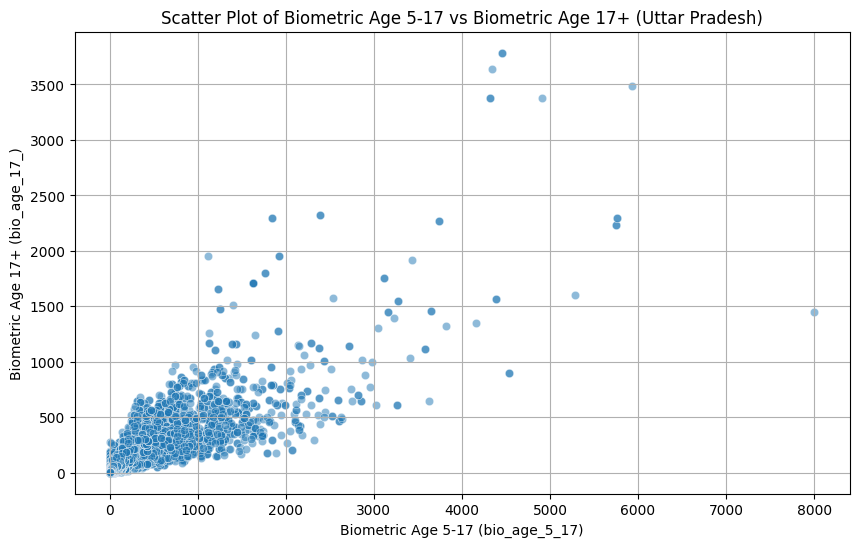

Scatter plot for 'bio_age_5_17' vs 'bio_age_17_' displayed.


In [639]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_up_merged, x='bio_age_5_17', y='bio_age_17_', alpha=0.5)
plt.title('Scatter Plot of Biometric Age 5-17 vs Biometric Age 17+ (Uttar Pradesh)')
plt.xlabel('Biometric Age 5-17 (bio_age_5_17)')
plt.ylabel('Biometric Age 17+ (bio_age_17_)')
plt.grid(True)
plt.show()

print("Scatter plot for 'bio_age_5_17' vs 'bio_age_17_' displayed.")

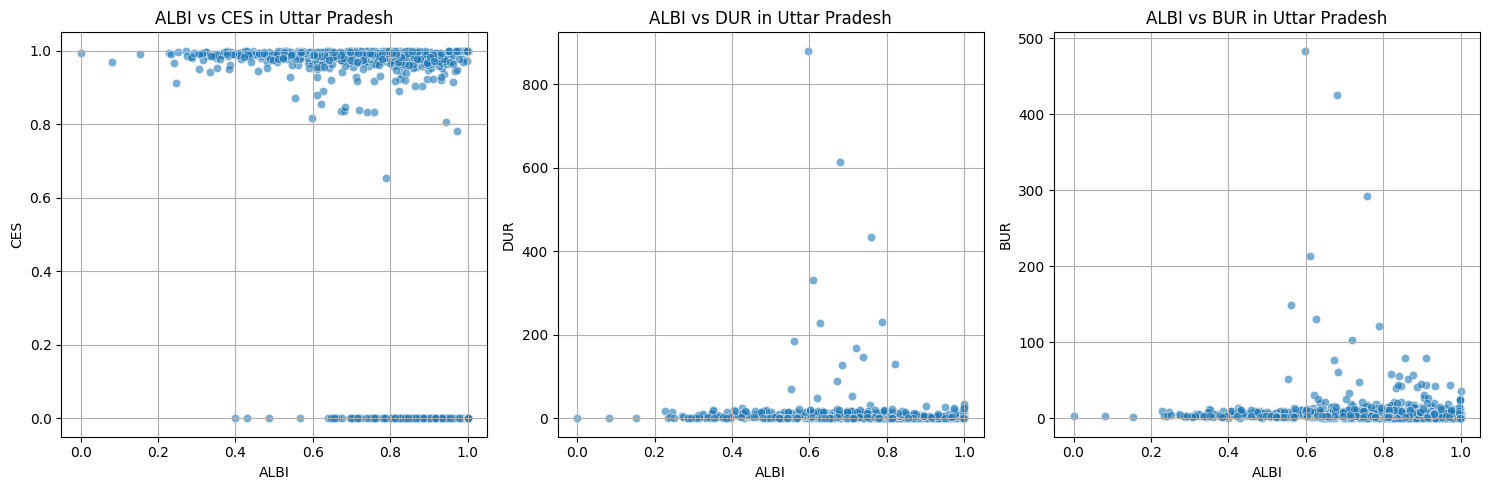

In [652]:
import matplotlib.pyplot as plt
import seaborn as sns

metrics_for_albi_scatter = ['CES', 'DUR', 'BUR']

plt.figure(figsize=(15, 5))
for i, metric in enumerate(metrics_for_albi_scatter):
    plt.subplot(1, 3, i + 1)
    sns.scatterplot(data=df_up_agg, x='ALBI', y=metric, alpha=0.6)
    plt.title(f'ALBI vs {metric} in Uttar Pradesh')
    plt.xlabel('ALBI')
    plt.ylabel(metric)
    plt.grid(True)
plt.tight_layout()
plt.show()

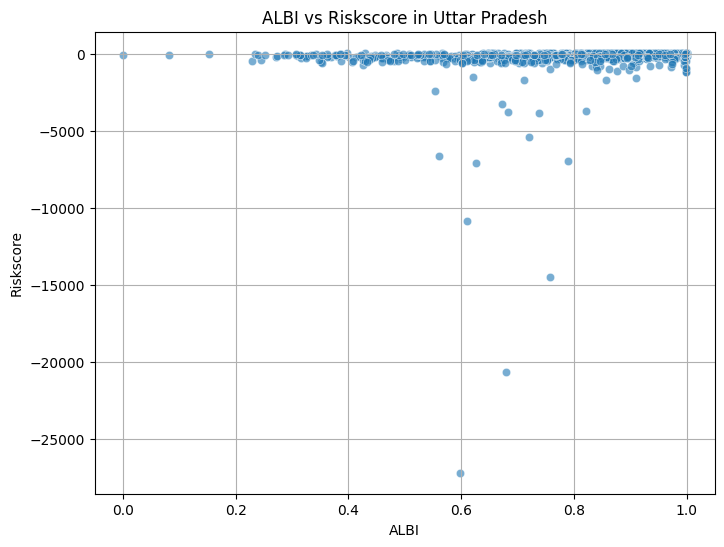

Bivariate analysis scatter plots for ALBI vs CES, DUR, BUR, and Riskscore displayed for Uttar Pradesh.


In [651]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_up_agg, x='ALBI', y='riskscore', alpha=0.6)
plt.title('ALBI vs Riskscore in Uttar Pradesh')
plt.xlabel('ALBI')
plt.ylabel('Riskscore')
plt.grid(True)
plt.show()

print("Bivariate analysis scatter plots for ALBI vs CES, DUR, BUR, and Riskscore displayed for Uttar Pradesh.")

Correlation Matrix for Uttar Pradesh:
                 age_0_5  age_5_17  age_18_greater  demo_age_5_17  \
age_0_5         1.000000  0.878657        0.632577       0.462861   
age_5_17        0.878657  1.000000        0.741612       0.373479   
age_18_greater  0.632577  0.741612        1.000000       0.276259   
demo_age_5_17   0.462861  0.373479        0.276259       1.000000   
demo_age_17_    0.424442  0.344246        0.249315       0.945495   
bio_age_5_17    0.266005  0.197818        0.221546       0.519994   
bio_age_17_     0.269667  0.206662        0.228235       0.587260   

                demo_age_17_  bio_age_5_17  bio_age_17_  
age_0_5             0.424442      0.266005     0.269667  
age_5_17            0.344246      0.197818     0.206662  
age_18_greater      0.249315      0.221546     0.228235  
demo_age_5_17       0.945495      0.519994     0.587260  
demo_age_17_        1.000000      0.546291     0.601798  
bio_age_5_17        0.546291      1.000000     0.857155  
bio

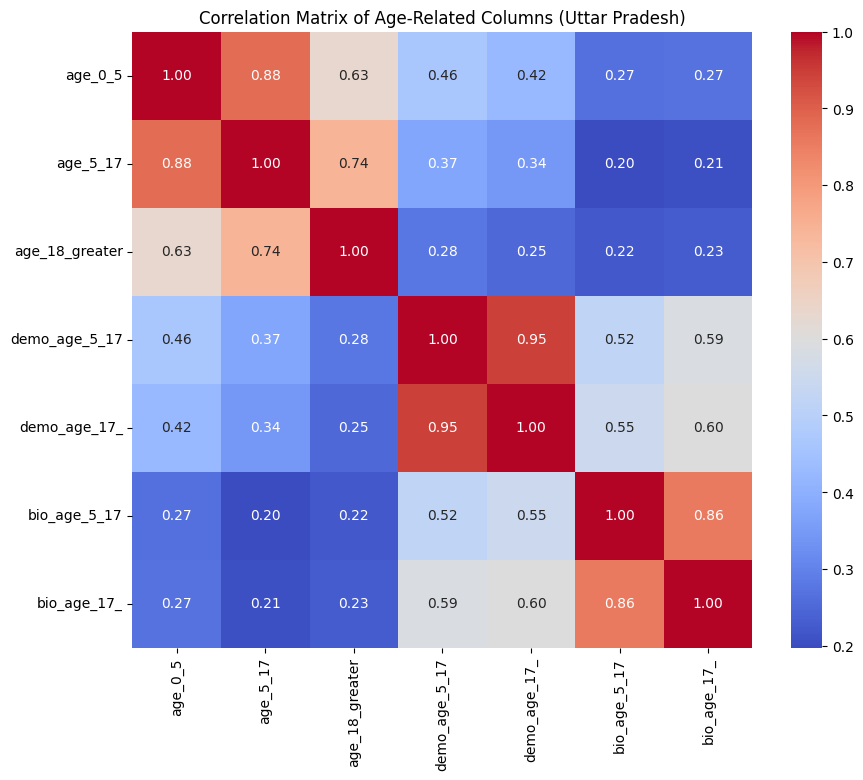

Correlation matrix heatmap for age-related columns displayed.


In [641]:
numerical_cols = ['age_0_5', 'age_5_17', 'age_18_greater', 'demo_age_5_17', 'demo_age_17_', 'bio_age_5_17', 'bio_age_17_']
correlation_matrix_up = df_up_merged[numerical_cols].corr()

print("Correlation Matrix for Uttar Pradesh:")
print(correlation_matrix_up)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_up, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Age-Related Columns (Uttar Pradesh)')
plt.show()

print("Correlation matrix heatmap for age-related columns displayed.")

In [642]:
age_cols_to_group = ['age_0_5', 'age_5_17', 'age_18_greater', 'demo_age_5_17', 'demo_age_17_', 'bio_age_5_17', 'bio_age_17_']
df_up_district_mean = df_up_merged.groupby('district')[age_cols_to_group].mean().reset_index()

print("District-wise average age-related data for Uttar Pradesh:")
print(df_up_district_mean.head())
print(df_up_district_mean.info())

District-wise average age-related data for Uttar Pradesh:
           district   age_0_5  age_5_17  age_18_greater  demo_age_5_17  \
0              Agra  3.050708  2.373538        0.166892       2.988431   
1           Aligarh  2.252908  1.909915        0.094323       2.000493   
2         Allahabad  1.003773  0.892790        0.009023       1.817652   
3    Ambedkar Nagar  0.742334  0.835011        0.012357       1.173455   
4  Ambedkar Nagar *  0.000000  0.000000        0.000000       0.000000   

   demo_age_17_  bio_age_5_17  bio_age_17_  
0     28.791262     24.875815    16.371200  
1     24.231224     19.565445     9.587325  
2     17.803544     19.110081    11.035272  
3     10.581465      8.671625     6.711327  
4      0.000000      0.000000     1.000000  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   district        98 non-null   

In [643]:
df_up_district_mean['total_avg_age'] = df_up_district_mean[age_cols_to_group].sum(axis=1)
df_up_district_mean_top10 = df_up_district_mean.nlargest(10, 'total_avg_age')

print("Top 10 districts by total average age-related counts:")
print(df_up_district_mean_top10[['district', 'total_avg_age']])
df_up_district_mean_melted = df_up_district_mean_top10.melt(
    id_vars=['district'],
    value_vars=age_cols_to_group,
    var_name='Age Group',
    value_name='Average Count'
)

print("Melted DataFrame for top 10 districts head:")
print(df_up_district_mean_melted.head())

Top 10 districts by total average age-related counts:
           district  total_avg_age
59      Kushi Nagar    1570.000000
91  Siddharth Nagar     723.500000
89        Shravasti     633.750000
75         Pilibhit     153.904368
80           Rampur     141.840456
20         Bareilly      97.446832
93          Sitapur      92.044878
81       Saharanpur      86.630609
87     Shahjahanpur      86.596878
88           Shamli      83.676090
Melted DataFrame for top 10 districts head:
          district Age Group  Average Count
0      Kushi Nagar   age_0_5     779.000000
1  Siddharth Nagar   age_0_5     267.166667
2        Shravasti   age_0_5     216.750000
3         Pilibhit   age_0_5       5.082251
4           Rampur   age_0_5       6.306980


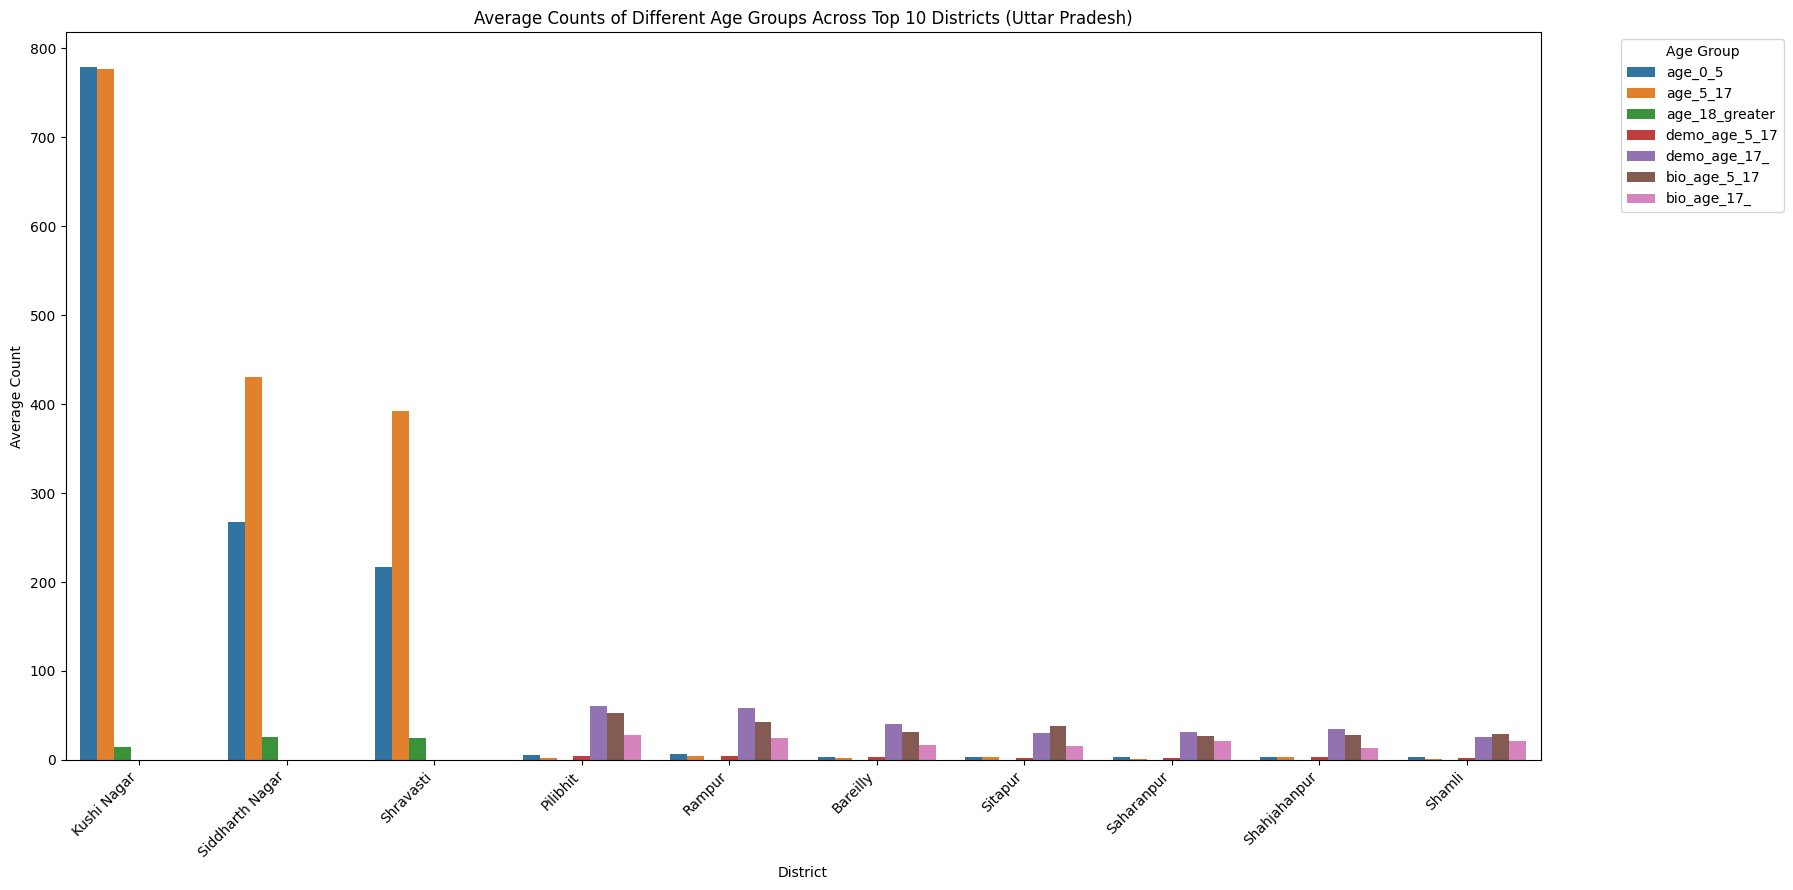

Grouped bar chart for average age-related counts across top 10 districts displayed.


In [644]:
plt.figure(figsize=(18, 9))
sns.barplot(data=df_up_district_mean_melted, x='district', y='Average Count', hue='Age Group', palette='tab10')
plt.title('Average Counts of Different Age Groups Across Top 10 Districts (Uttar Pradesh)')
plt.xlabel('District')
plt.ylabel('Average Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

print("Grouped bar chart for average age-related counts across top 10 districts displayed.")

Time-series aggregated data (sum of age-related columns per date):
        date  age_0_5  age_5_17  age_18_greater  demo_age_5_17  demo_age_17_  \
0 2025-03-01      0.0       0.0             0.0       165667.0     2138144.0   
1 2025-03-09    274.0     731.0           108.0            0.0           0.0   
2 2025-03-15    320.0    1067.0           217.0            0.0           0.0   
3 2025-03-20    466.0     933.0           153.0            0.0           0.0   
4 2025-03-23     40.0     140.0            24.0            0.0           0.0   

   bio_age_5_17  bio_age_17_  
0      918059.0     476904.0  
1           0.0          0.0  
2           0.0          0.0  
3           0.0          0.0  
4           0.0          0.0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236 entries, 0 to 235
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            236 non-null    datetime64[ns]
 1   a

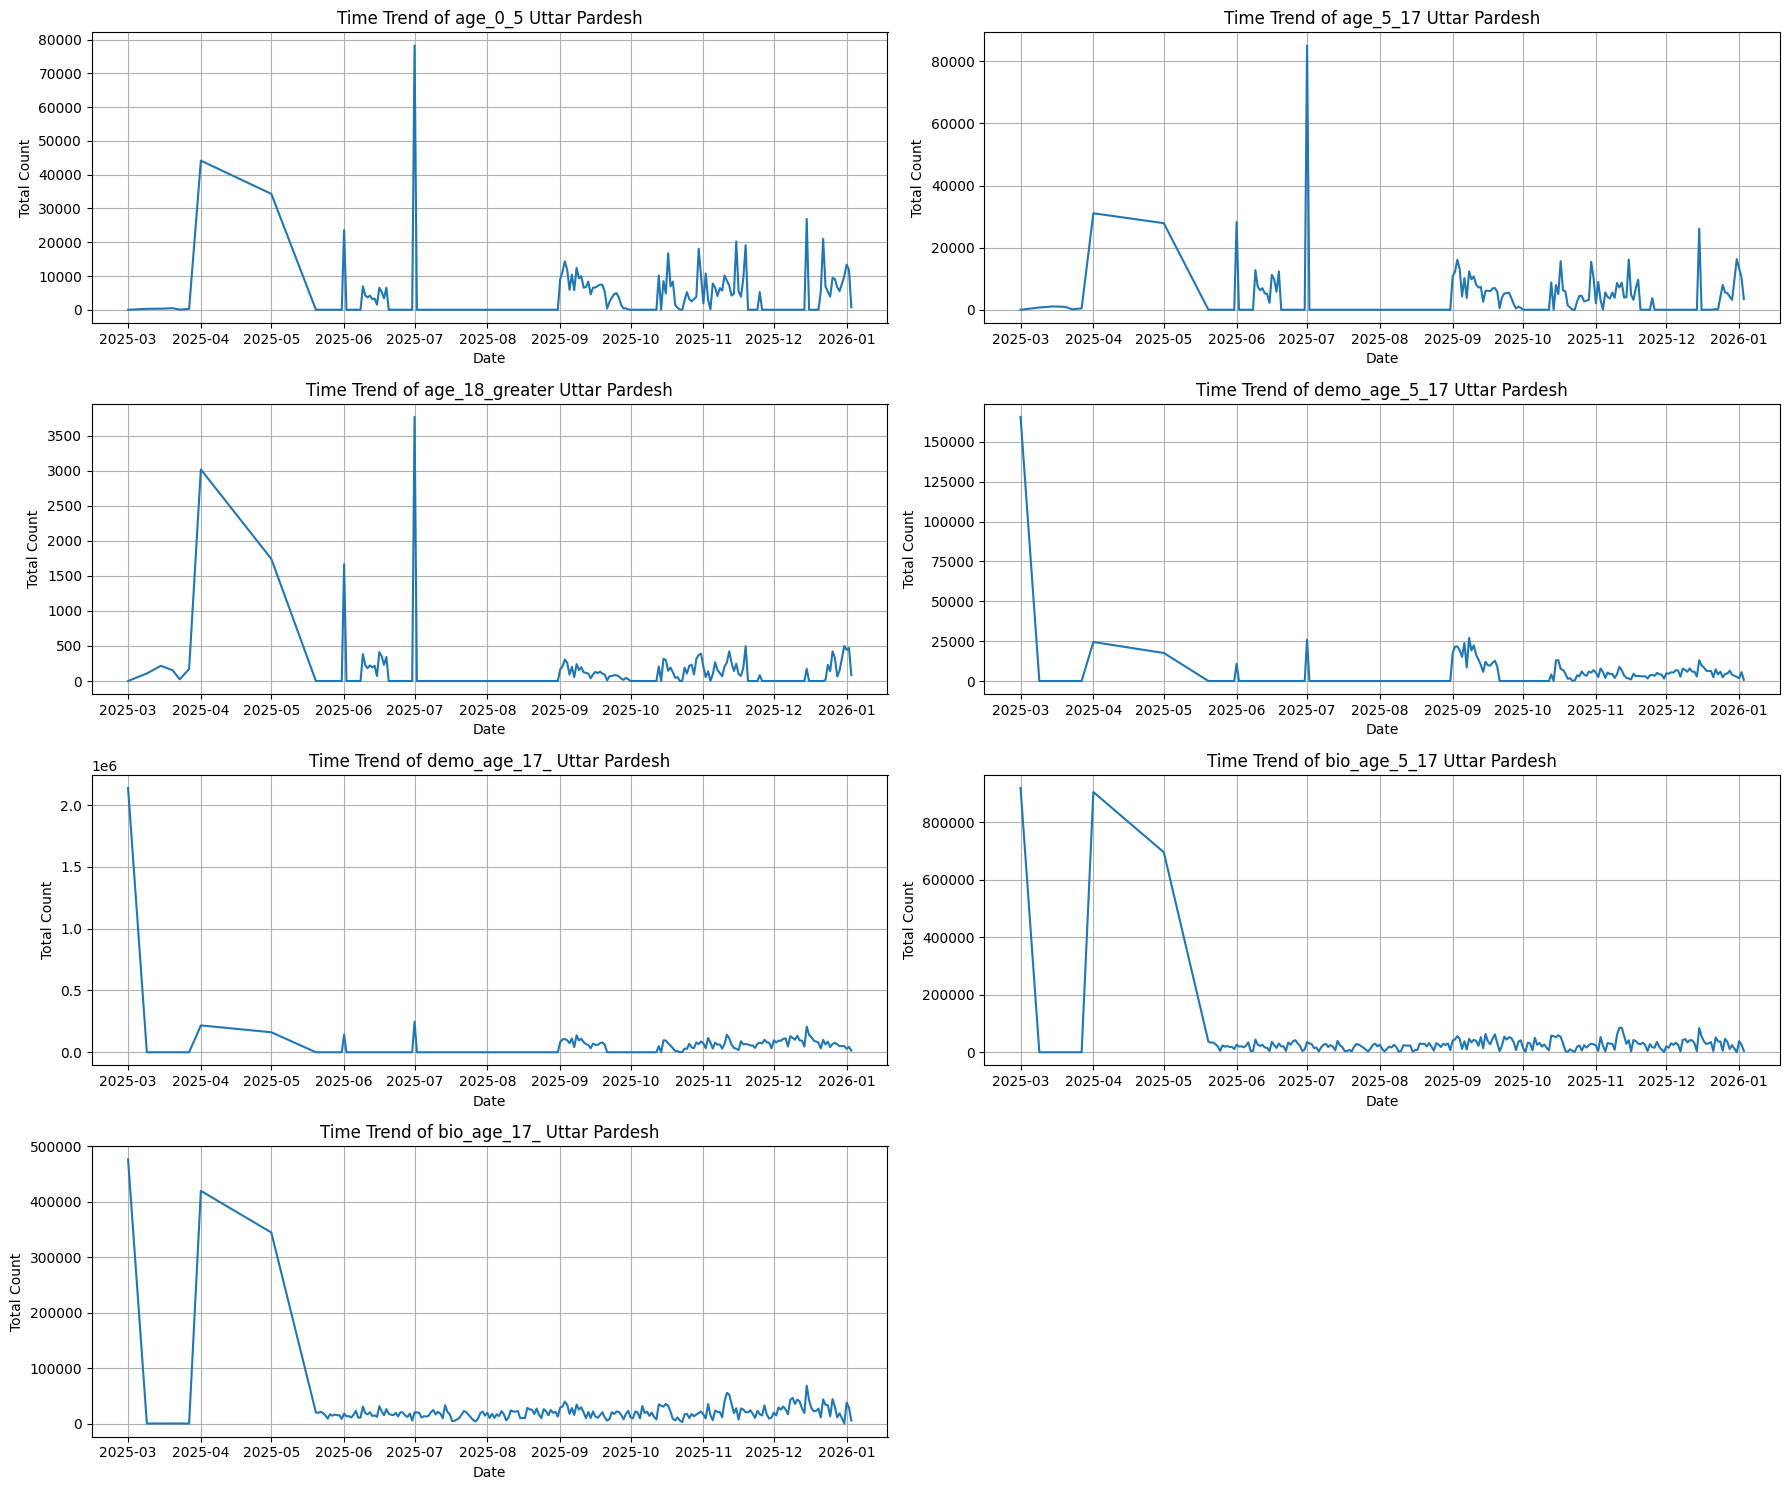

Insight: Line charts for each age-related column over time provide a clear visualization of their temporal trends, allowing for the identification of periods of high/low activity or significant changes.


In [653]:
df_up_time_trend = df_up_merged.groupby('date')[age_cols_to_group].sum().reset_index()

print("Time-series aggregated data (sum of age-related columns per date):")
print(df_up_time_trend.head())
print(df_up_time_trend.info())
plt.figure(figsize=(18, 15))
for i, col in enumerate(age_cols_to_group):
    plt.subplot(4, 2, i + 1) # Adjust subplot grid based on number of columns
    sns.lineplot(data=df_up_time_trend, x='date', y=col)
    plt.title(f'Time Trend of {col} Uttar Pardesh')
    plt.xlabel('Date')
    plt.ylabel('Total Count')
    plt.grid(True)
plt.tight_layout()
plt.show()

print("Insight: Line charts for each age-related column over time provide a clear visualization of their temporal trends, allowing for the identification of periods of high/low activity or significant changes.")

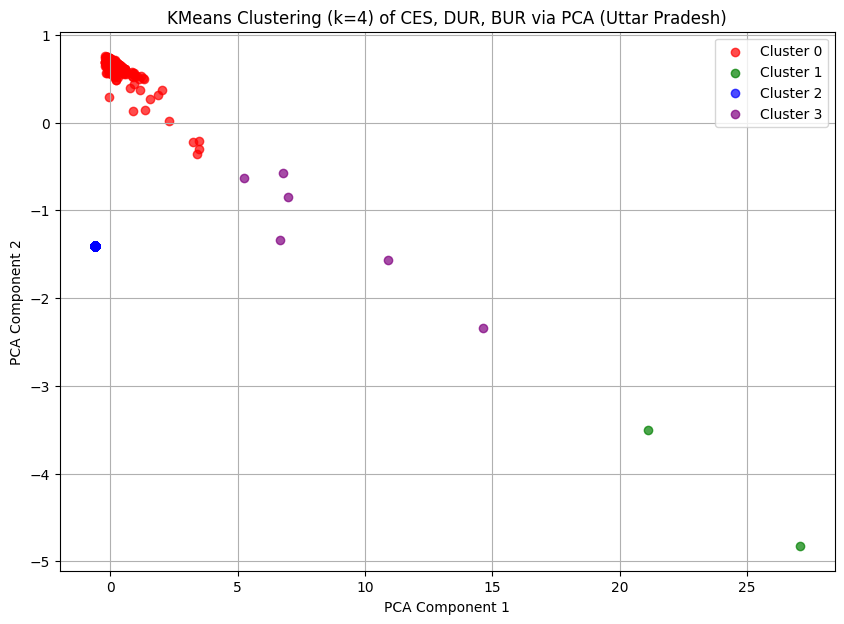

First 5 rows of df_up_agg with 'clusterlabel' column:
   year  month          state        district  age_0_5  age_5_17  \
0  2025      3  Uttar Pradesh            Agra    280.0     494.0   
1  2025      3  Uttar Pradesh         Aligarh    226.0     353.0   
2  2025      3  Uttar Pradesh       Allahabad      0.0       0.0   
3  2025      3  Uttar Pradesh  Ambedkar Nagar      0.0       0.0   
4  2025      3  Uttar Pradesh          Amethi      0.0       0.0   

   age_18_greater  demo_age_5_17  demo_age_17_  bio_age_5_17  ...     Bnorm  \
0           132.0         3843.0       40068.0       17105.0  ...  0.522483   
1            44.0         2359.0       31457.0       16168.0  ...  0.397265   
2             0.0         4090.0       50209.0       22258.0  ...  0.634235   
3             0.0         1957.0       21208.0        5519.0  ...  0.203730   
4             0.0         1304.0       18225.0        5567.0  ...  0.186382   

    stdnorm      ALBI  Enormrisk  CESrisknorm  DURrisknorm  BU

In [646]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

# 1. Select the columns for clustering
features_for_clustering = df_up_agg[['CES', 'DUR', 'BUR']]

# 2. Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_for_clustering)

# 3. Apply KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
kmeans.fit(scaled_features)

# 4. Add the cluster labels to df_up_agg
df_up_agg['clusterlabel'] = kmeans.labels_

# 5. Apply PCA for dimensionality reduction
pca = PCA(n_components=2, random_state=42)
pca_components = pca.fit_transform(scaled_features)

# Create a DataFrame for PCA components for easier plotting
pca_df = pd.DataFrame(data=pca_components, columns=['PCA Component 1', 'PCA Component 2'])
pca_df['clusterlabel'] = df_up_agg['clusterlabel']

# 6. Generate a PCA scatter plot to visualize these clusters
plt.figure(figsize=(10, 7))
colors = ['red', 'green', 'blue', 'purple']

for i in range(4):
    plt.scatter(
        pca_df[pca_df['clusterlabel'] == i]['PCA Component 1'],
        pca_df[pca_df['clusterlabel'] == i]['PCA Component 2'],
        c=colors[i],
        label=f'Cluster {i}',
        alpha=0.7
    )

plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('KMeans Clustering (k=4) of CES, DUR, BUR via PCA (Uttar Pradesh)')
plt.legend()
plt.grid(True)
plt.show()

print("First 5 rows of df_up_agg with 'clusterlabel' column:")
print(df_up_agg.head())

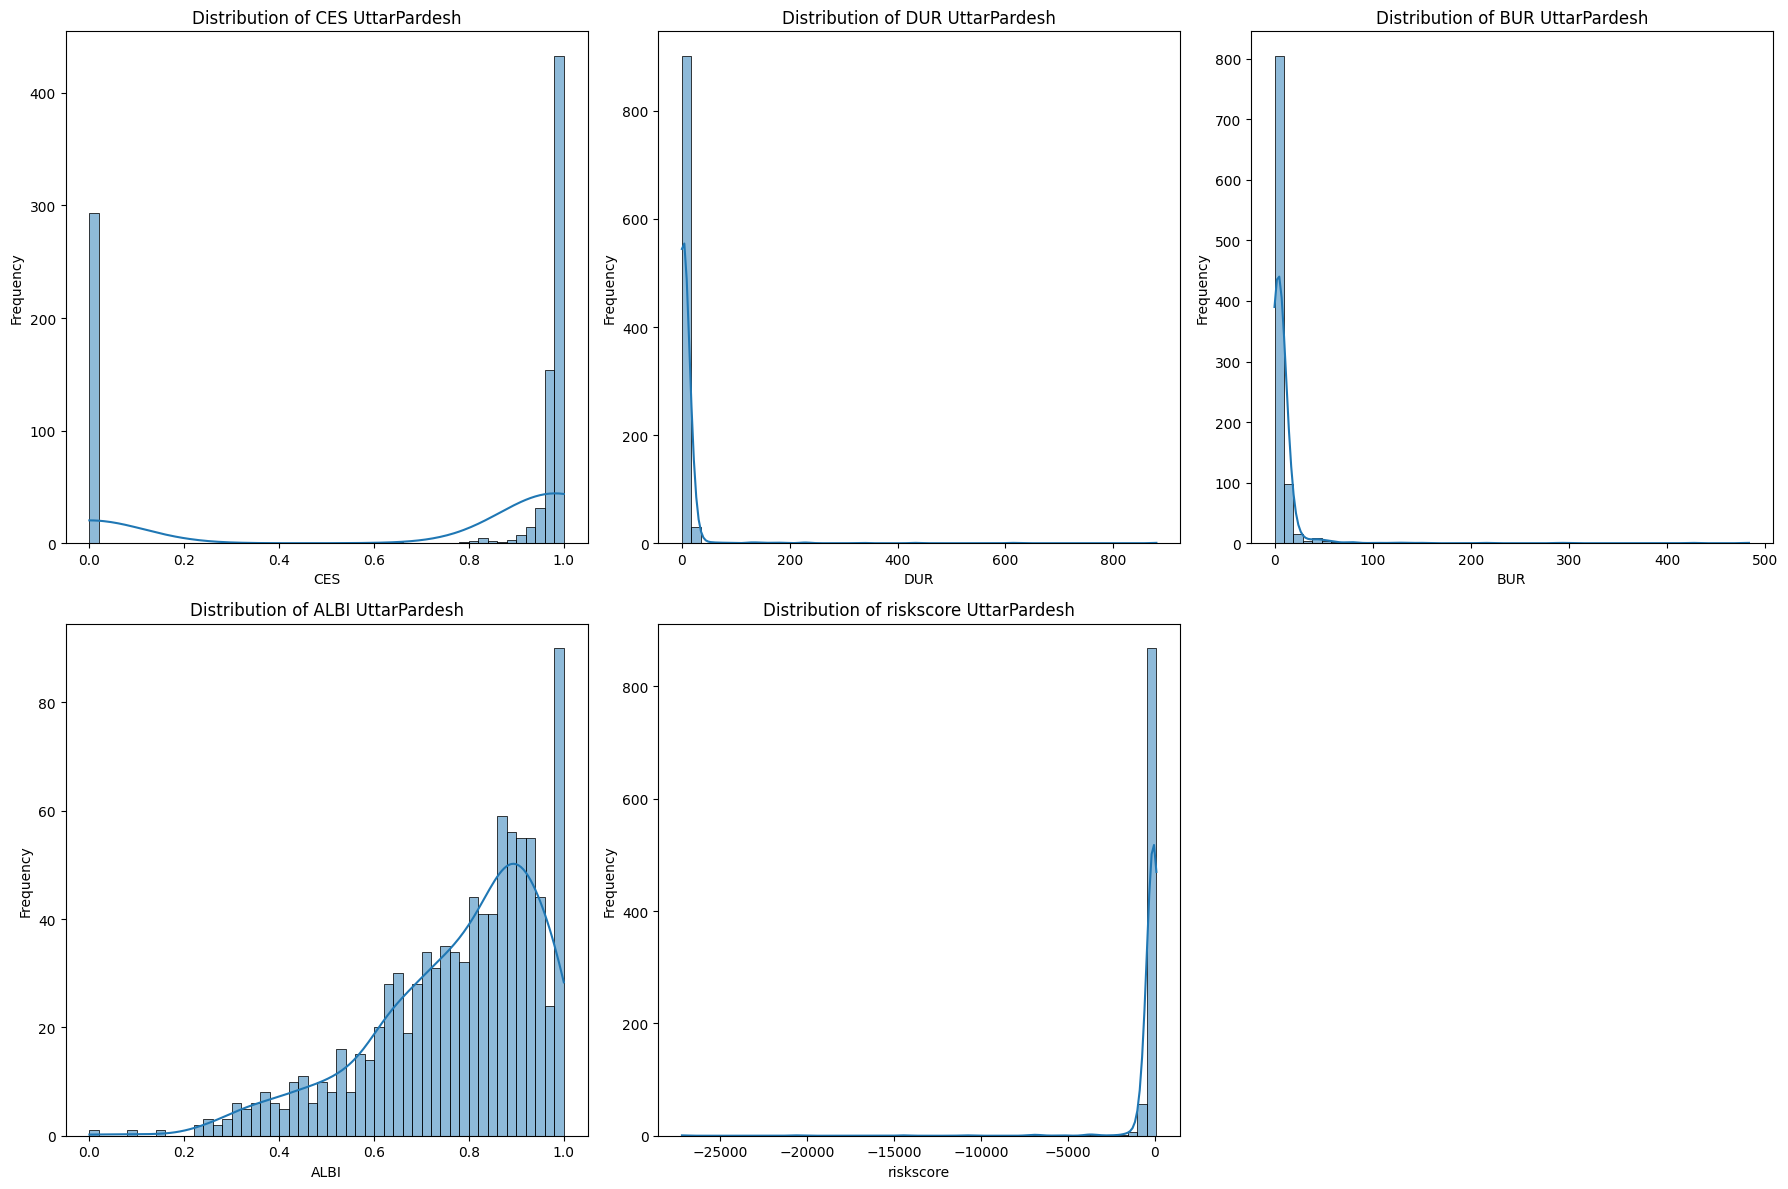

Histograms for CES, DUR, BUR, ALBI, and riskscore displayed.


In [655]:
metrics_to_plot = ['CES', 'DUR', 'BUR', 'ALBI', 'riskscore']

plt.figure(figsize=(18, 12))
for i, metric in enumerate(metrics_to_plot):
    plt.subplot(2, 3, i + 1)
    sns.histplot(df_up_agg[metric], bins=50, kde=True)
    plt.title(f'Distribution of {metric} UttarPardesh')
    plt.xlabel(metric)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

print("Histograms for CES, DUR, BUR, ALBI, and riskscore displayed.")

In [656]:
import pandas as pd

# 1. Find the latest year and month
latest_year = df_up_agg['year'].max()
latest_month = df_up_agg[df_up_agg['year'] == latest_year]['month'].max()

print(f"Latest reporting period: Year {latest_year}, Month {latest_month}")

# 2. Filter df_up_agg for the latest year and month
df_latest_month = df_up_agg[(df_up_agg['year'] == latest_year) & (df_up_agg['month'] == latest_month)].copy()

# Metrics to analyze
metrics = ['CES', 'DUR', 'BUR', 'ALBI', 'riskscore']

# 3. For each metric, print top 10 and bottom 10 districts
for metric in metrics:
    print(f"\n--- Metric: {metric} ---")

    # Top 10 districts
    top_10 = df_latest_month.sort_values(by=metric, ascending=False).head(10)
    print(f"\nTop 10 Districts by {metric} (Year {latest_year}, Month {latest_month}):")
    print(top_10[['district', metric]].to_string(index=False))

    # Bottom 10 districts
    bottom_10 = df_latest_month.sort_values(by=metric, ascending=True).head(10)
    print(f"\nBottom 10 Districts by {metric} (Year {latest_year}, Month {latest_month}):")
    print(bottom_10[['district', metric]].to_string(index=False))

Latest reporting period: Year 2026, Month 1

--- Metric: CES ---

Top 10 Districts by CES (Year 2026, Month 1):
                  district      CES
                   Ayodhya 1.000000
                    Bagpat 1.000000
                   Bhadohi 1.000000
       Jyotiba Phule Nagar 1.000000
              Bulandshahar 1.000000
                    Mahoba 1.000000
Sant Ravidas Nagar Bhadohi 1.000000
                 Chandauli 0.997717
               Farrukhabad 0.996604
                  Mirzapur 0.996086

Bottom 10 Districts by CES (Year 2026, Month 1):
      district      CES
  Kushinagar * 0.000000
    Mahrajganj 0.000000
     Shrawasti 0.916388
      Bahraich 0.942469
        Budaun 0.943960
       Auraiya 0.948529
Siddharthnagar 0.950593
        Hardoi 0.952033
    Pratapgarh 0.952328
      Pilibhit 0.956357

--- Metric: DUR ---

Top 10 Districts by DUR (Year 2026, Month 1):
           district      DUR
Jyotiba Phule Nagar 5.500000
          Prayagraj 3.008929
             Jalaun 2.6

## Summary:


The comprehensive summary of the key findings from the Uttar Pradesh analysis highlights several aspects regarding top/bottom performers and significant observations. Key findings include the identification of districts with high and low Child Enrolment Scores (CES), high Demographic and Biometric Update Rates (DUR/BUR), and districts with low Aadhaar Lifecycle Balance Index (ALBI) values, suggesting areas for further investigation or intervention. The analysis also revealed strong correlations among various age-related update categories and identified top-performing districts based on overall activity.

### Data Analysis Key Findings
*   **Data Preparation**: Enrolment, demographic, and biometric datasets for Uttar Pradesh were successfully loaded, their 'date' columns converted to datetime objects, and then merged into a single DataFrame. Missing numerical values resulting from the merge were filled with 0.
*   **Key Metric Calculation**: Several metrics were computed, including `totalenrolments`, `childenrolments`, `totaldemoupdates`, `totalbioupdates`, `CES` (Child Enrolment Score), `DUR` (Demographic Update Rate), and `BUR` (Biometric Update Rate).
    *   A significant observation was that `DUR` and `BUR` could sometimes be greater than 1, implying that the number of updates exceeded the total enrolments for specific districts/periods.
*   **Aadhaar Lifecycle Balance Index (ALBI) & Risk Score**: Normalized versions of enrolment and update metrics were used to calculate the `ALBI` and a consolidated `riskscore` (scaled 0-100).
*   **District Performance (Latest Period - Year 2026, Month 1)**:
    *   **High CES**: Districts like Ayodhya, Bagpat, Bhadohi, Jyotiba Phule Nagar, Bulandshahar, Mahoba, and Sant Ravidas Nagar Bhadohi showed high Child Enrolment Scores.
    *   **Low CES**: Kushinagar and Mahrajganj recorded a CES of 0, indicating no child enrolments relative to total enrolments in the latest period.
    *   **High DUR/BUR**: Jyotiba Phule Nagar and Prayagraj exhibited high Demographic and Biometric Update Rates.
    *   **Low ALBI (High Imbalance)**: Districts such as Lucknow and Kanpur Nagar had particularly low ALBI scores, suggesting an imbalance in their Aadhaar lifecycle activities.
*   **Inter-metric Correlations**: A strong positive correlation (approximately 0.95) was observed between `demo_age_5_17` and `demo_age_17_`, and similarly, a strong positive correlation (approximately 0.86) was found between `bio_age_5_17` and `bio_age_17_`, indicating similar trends within demographic and biometric updates across these age groups. Moderate to strong positive correlations were also found among the enrolment age groups.
*   **Top Performing Districts (Average Age Counts)**: Based on the sum of average age-related counts, Kushi Nagar, Siddharth Nagar, and Shravasti were identified as the top 3 districts, suggesting higher overall activity or population engagement in these areas.
*   **Clustering Analysis**: Four distinct clusters of districts were identified using KMeans clustering on `CES`, `DUR`, and `BUR` metrics, highlighting different operational profiles or performance levels across regions.

### Insights or Next Steps
*   Investigate the specific conditions in districts with 0 CES, such as Kushinagar and Mahrajganj, to understand the barriers to child enrolments and implement targeted programs.
*   Conduct a deeper analysis into the instances where `DUR` or `BUR` exceed 1 to determine if these are data anomalies, reporting discrepancies, or unique update patterns that require specific policy considerations.
*   Further characterize the four identified clusters to develop tailored strategies and resource allocation plans, addressing the specific needs and challenges of each cluster.
